<a href="https://colab.research.google.com/github/SuperGeekBrain/coal-exploration/blob/master/Covered_Call_Payoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covered call strategy**

A covered call strategy is built by going long on a stock and simultaneously selling a call option on that stock. The strategy is used when the view on the stock is neutral. In this notebook, we will build a payoff graph for the Wipro stock bought for GBP 300 and short 300 strike call.

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# For making am attractive and informative statistical graph
plt.style.use('seaborn-darkgrid') 

**Call payoff**

We define a function that calculates the payoff from buying a call option. The function takes **sT** which is a range of possible values of the stock price at expiration, the strike price of the call and premium of the call option as input. It returns the call option payoff.

In [3]:
def call_payoff(sT, strike_price, premium):
  return np.where(sT > strike_price, sT - strike_price, 0) - premium

**Define parameters**

In [7]:
# Wipro stock price 
spot_price = 300

# Short call
strike_price_short_call = 300
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

**Wipro stock payoff**

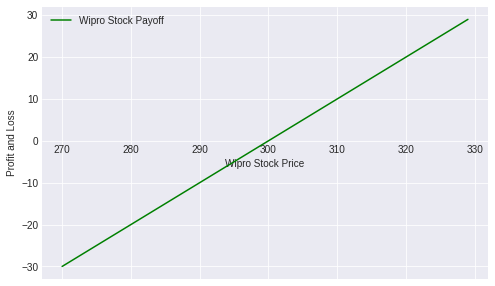

In [9]:
payoff_wirpo_stock = sT-300
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_wirpo_stock,label='Wipro Stock Payoff',color='g')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()


**Short 300 strike call payoff**

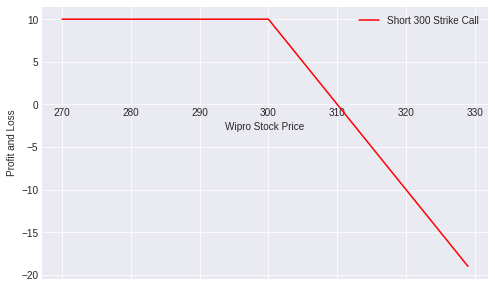

In [10]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 300 Strike Call',color='r')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

**Covered call payoff**

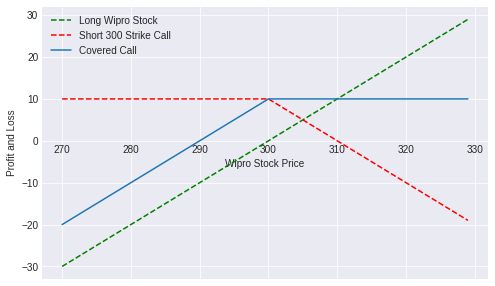

In [11]:
covered_call_payoff = payoff_wipro_stock + payoff_short_call
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_wipro_stock,'--',label='Long Wipro Stock',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 300 Strike Call',color='r')
ax.plot(sT,covered_call_payoff,label='Covered Call')
plt.xlabel('Wipro Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

The max profit is capped at GBP 10 if the Wipro stock moves to any price above GBP 300 and the max loss is proportional to price fall below GBP 300.

